In [2]:
#Imnporting libraries
import pandas as pd
import numpy as np
from scipy.optimize import fmin_slsqp
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import math
import scipy
import scipy.stats as stats
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from sklearn import datasets

#Listing the existing files in the dir
for root, dirs, files in os.walk("."):  
    for filename in files:
        print(filename)

code.ipynb
time_series.ipynb
COMMIT_EDITMSG
config
description
HEAD
index
applypatch-msg.sample
commit-msg.sample
fsmonitor-watchman.sample
post-update.sample
pre-applypatch.sample
pre-commit.sample
pre-push.sample
pre-rebase.sample
pre-receive.sample
prepare-commit-msg.sample
update.sample
exclude
HEAD
master
master
008e38e53173d537c97cd7f0f4c9095cc2c920
5a164683dab14a2c38acea119d67b93896b80a
42a29f266ab659e685cef3802de3af0e1b61c7
8a1b4139c3977dfd8d9b5554209bbd4b960b64
872ad8190c605e1d9fc59f28d1f79ae53d89f8
a33ca8eed5e64a40f3eba250a9456699bc62a0
381bfa563cb65d2ec3985e03ebaa2359e10a71
9864d8ecfa50c20ab18f5b85d01278e59e7f0b
30de484fef1ecf25afffc168ba3db93f4d7b1a
1513c0511644910cbc26c17a28a8c879bce210
5b3085f2e9829934c4a12c334426119a375377
16b12baa8b1a948a9e67981adb0454669ad9d7
666c30c1bf494e6cc5450522b02b91518ff2a2
aae65cbb38481bb2bbcfb9a366509f341e5415
5a9ef48e968702bd05910934e88288ee4d966f
0614393d2777410e9035f7aedccda203584bc8
6fc1ae2dad946024d09476d9a106472158e049
5b75490a4d94046231

In [21]:
#Reading the file
df = pd.read_csv('./files/energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [22]:
#Setting up the date to be the index,otherwise time series won't work
df = df.reset_index()
df.head()

,index,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [41]:
#Setting the date to be the new index
df = df.set_index('date')
# Convert the date index to datetime
#df.index = pd.to_datetime(df.index)
#df.head()

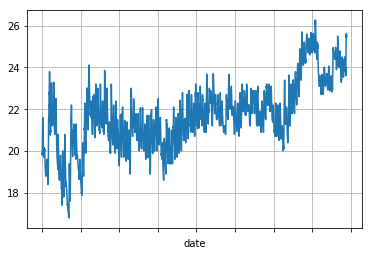

In [42]:
# Plot the entire time series diet and show gridlines
df['T1'].plot(grid = True)
plt.show()

In [54]:
df_pct = df.pct_change().fillna(0).astype(float).add_suffix('_PCT_CHG')
df_pct.head()
correlation = df_pct['Windspeed_PCT_CHG'].corr(df_pct['RH_1_PCT_CHG'])
correlation

nan